C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18000\2034969983.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_date, end=end_date, freq='H')


<Figure size 1200x600 with 0 Axes>

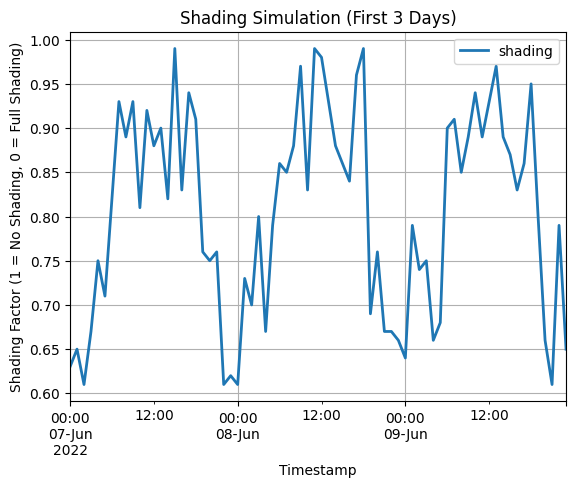

            timestamp  shading
0 2022-06-07 00:00:00     0.63
1 2022-06-07 01:00:00     0.65
2 2022-06-07 02:00:00     0.61
3 2022-06-07 03:00:00     0.67
4 2022-06-07 04:00:00     0.75


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2022, 6, 7)
end_date = datetime(2024, 6, 7)

# Generate hourly timestamps between the start and end date
time_index = pd.date_range(start=start_date, end=end_date, freq='H')

# Function to simulate shading based on time of year and random variation
def simulate_shading(timestamp):
    month = timestamp.month
    hour = timestamp.hour

    # Summer (June to September) - mostly no shading
    if 6 <= month <= 9:
        base_shading = 0.9 if 6 <= hour <= 18 else 0.7  # daytime vs night
    # Winter (November to February) - mostly shading
    elif 11 <= month <= 2:
        base_shading = 0.3 if 6 <= hour <= 18 else 0.2  # daytime vs night
    # Spring and Fall (March to May, October)
    else:
        base_shading = 0.7 if 6 <= hour <= 18 else 0.5  # daytime vs night

    # Introduce random fluctuation for each hour
    fluctuation = np.random.uniform(-0.1, 0.1)
    shading_value = base_shading + fluctuation
    shading_value = np.clip(shading_value, 0, 1)  # Ensure the value is between 0 and 1

    return round(shading_value, 2)  # Round to 2 decimal places

# Generate shading data for each timestamp
shading_data = [simulate_shading(timestamp) for timestamp in time_index]

# Create DataFrame with the results
df_shading = pd.DataFrame({
    'timestamp': time_index,
    'shading': shading_data
})

# Save the data to an Excel file
df_shading.to_excel('pv_shading_data.xlsx', index=False)

# Plot the data for visual inspection (for the first few days as an example)
plt.figure(figsize=(12, 6))
df_shading.head(24 * 3).plot(x='timestamp', y='shading', title='Shading Simulation (First 3 Days)', lw=2)
plt.xlabel('Timestamp')
plt.ylabel('Shading Factor (1 = No Shading, 0 = Full Shading)')
plt.grid(True)
plt.show()

# Print a preview of the data
print(df_shading.head())
